Beautiful Soup is a Python library used for web scraping purposes. It allows you to extract and manipulate data from HTML and XML documents. Here's an example to demonstrate how to use Beautiful Soup to scrape and process a webpage:


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
densityLink = 'https://visaguide.world/asia/'
gdpLink = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_GDP'

In [3]:
densityData=requests.get(densityLink)
densityData.status_code

200

In [4]:
densityData.text

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\t<link rel="profile" href="https://gmpg.org/xfn/11"> \n\t<meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n\t<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>\n\t\n\t<!-- This site is optimized with the Yoast SEO plugin v24.2 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<title>List of Countries in Asia - VisaGuide.World</title><link rel="preload" data-rocket-preload as="image" href="https://visaguide.world/wp-content/uploads/2023/01/Visa-Guide-World.svg" fetchpriority="high"><link rel="preload" data-rocket-preload as="style" href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&#038;display=swap" /><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&#038;display=swap" 

In [5]:
densitySoup=BeautifulSoup(densityData.text,'html.parser')
densitySoup
type(densitySoup)

bs4.BeautifulSoup

In [6]:
densityTable=densitySoup.find_all('table')
densityTable

[<table>
 <tbody>
 <tr>
 <td>Area</td>
 <td>44.57 million km²</td>
 </tr>
 <tr>
 <td>Number of countries</td>
 <td>51 (49 recognized by the UN)</td>
 </tr>
 <tr>
 <td>Population</td>
 <td>4.561 billion</td>
 </tr>
 <tr>
 <td>Number of languages spoken</td>
 <td>2,300 languages across the continent</td>
 </tr>
 <tr>
 <td>Biggest country (by area)</td>
 <td>China (9.6 million km²)</td>
 </tr>
 <tr>
 <td>Most populated country</td>
 <td>China (1.4 billion)</td>
 </tr>
 <tr>
 <td>Highest mountain</td>
 <td>Mount Everest</td>
 </tr>
 <tr>
 <td>Longest river</td>
 <td>Yangtze (Cháng Jiāng) in China</td>
 </tr>
 <tr>
 <td>Largest lake</td>
 <td>Baikal Lake in Russia</td>
 </tr>
 </tbody>
 </table>,
 <table>
 <thead>
 <tr>
 <th>Country</th>
 <th>Capital</th>
 <th>Area km2</th>
 <th>Population (2021)</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>Afghanistan</td>
 <td>Kabul</td>
 <td>652,864</td>
 <td>39,835,428</td>
 </tr>
 <tr>
 <td>Armenia</td>
 <td>Yerevan</td>
 <td>29,743</td>
 <td>2,968,127</t

In [7]:
densityHeaders=densityTable[1].find_all('th')
densityHeaders=[head.text for head in densityHeaders]
densityHeaders


['Country', 'Capital', 'Area km2', 'Population (2021)']

In [8]:
densityRows=densityTable[1].find_all('td')
densityRows=[rows.text for rows in densityRows]
densityRows

['Afghanistan',
 'Kabul',
 '652,864',
 '39,835,428',
 'Armenia',
 'Yerevan',
 '29,743',
 '2,968,127',
 'Azerbaijan',
 'Baku',
 '86,600',
 '10,223,342',
 'Bahrain',
 'Manama',
 '760',
 '1,748,296',
 'Bangladesh',
 'Dhaka',
 '147,570',
 '166,303,498',
 'Bhutan',
 'Thimphu',
 '38,394',
 '779,898',
 'Brunei',
 'Bandar Seri Begawan',
 '5,765',
 '441,532',
 'Cambodia',
 'Phnom Penh',
 '181,035',
 '16,946,438',
 'China (PRC)',
 'Beijing',
 '9,596,961',
 '1,444,216,107',
 'East Timor',
 'Dili',
 '14,874',
 '1,343,873',
 'Georgia',
 'Tbilisi',
 '69,700',
 '3,979,765',
 'Hong Kong',
 'City of Victoria',
 '2,755',
 '7,552,810',
 'India',
 'New Delhi',
 '3,287,263',
 '1,393,409,038',
 'Indonesia',
 'Jakarta',
 '1,904,569',
 '276,361,783',
 'Iran',
 'Tehran',
 '1,648,195',
 '85,028,759',
 'Iraq',
 'Baghdad',
 '438,317',
 '41,179,350',
 'Israel',
 'Jerusalem (disputed)',
 '20,770',
 '8,789,774',
 'Japan',
 'Tokyo',
 '377,915',
 '126,050,804',
 'Jordan',
 'Amman',
 '89,342',
 '10,269,021',
 'Kazakhst

In [9]:
D={}
start=0
for head in densityHeaders:
    D[head]=[densityRows[i] for i in range(start,len(densityRows),len(densityHeaders))]
    start+=1
for i,j in D.items():
    print(f'{i}:{j}')

Country:['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China (PRC)', 'East Timor', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'The Philippines', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
Capital:['Kabul', 'Yerevan', 'Baku', 'Manama', 'Dhaka', 'Thimphu', 'Bandar Seri Begawan', 'Phnom Penh', 'Beijing', 'Dili', 'Tbilisi', 'City of Victoria', 'New Delhi', 'Jakarta', 'Tehran', 'Baghdad', 'Jerusalem (disputed)', 'Tokyo', 'Amman', 'Nur-Sultan', 'Kuwait City', 'Bishkek', 'Vientiane', 'Beirut', 'Macau', 'Kuala Lumpur', 'Malé', 'Ulaanbaatar', 'Naypyidaw', 'Kathmandu', 'P

In [10]:
densityDf=pd.DataFrame(D)
densityDf.index=range(1,len(densityDf)+1)
densityDf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864","39,835,428"
2,Armenia,Yerevan,"29,743","2,968,127"
3,Azerbaijan,Baku,"86,600","10,223,342"
4,Bahrain,Manama,760,"1,748,296"
5,Bangladesh,Dhaka,"147,570","166,303,498"
6,Bhutan,Thimphu,"38,394","779,898"
7,Brunei,Bandar Seri Begawan,"5,765","441,532"
8,Cambodia,Phnom Penh,"181,035","16,946,438"
9,China (PRC),Beijing,"9,596,961","1,444,216,107"
10,East Timor,Dili,"14,874","1,343,873"


In [11]:
densityDf['Population (2021)']=densityDf['Population (2021)'].str.replace(',','').astype(int)
densityDf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864",39835428
2,Armenia,Yerevan,"29,743",2968127
3,Azerbaijan,Baku,"86,600",10223342
4,Bahrain,Manama,760,1748296
5,Bangladesh,Dhaka,"147,570",166303498
6,Bhutan,Thimphu,"38,394",779898
7,Brunei,Bandar Seri Begawan,"5,765",441532
8,Cambodia,Phnom Penh,"181,035",16946438
9,China (PRC),Beijing,"9,596,961",1444216107
10,East Timor,Dili,"14,874",1343873


In [12]:
densityDf['Area km2']=densityDf['Area km2'].str.replace(",","").astype(int)
densityDf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,652864,39835428
2,Armenia,Yerevan,29743,2968127
3,Azerbaijan,Baku,86600,10223342
4,Bahrain,Manama,760,1748296
5,Bangladesh,Dhaka,147570,166303498
6,Bhutan,Thimphu,38394,779898
7,Brunei,Bandar Seri Begawan,5765,441532
8,Cambodia,Phnom Penh,181035,16946438
9,China (PRC),Beijing,9596961,1444216107
10,East Timor,Dili,14874,1343873


In [13]:
densityDf['Population Density']=densityDf['Population (2021)']/densityDf['Area km2']
densityDf


,Country,Capital,Area km2,Population (2021),Population Density
1,Afghanistan,Kabul,652864,39835428,61.016426
2,Armenia,Yerevan,29743,2968127,99.792455
3,Azerbaijan,Baku,86600,10223342,118.052448
4,Bahrain,Manama,760,1748296,2300.389474
5,Bangladesh,Dhaka,147570,166303498,1126.946520
6,Bhutan,Thimphu,38394,779898,20.313018
7,Brunei,Bandar Seri Begawan,5765,441532,76.588378
8,Cambodia,Phnom Penh,181035,16946438,93.608628
9,China (PRC),Beijing,9596961,1444216107,150.486816
10,East Timor,Dili,14874,1343873,90.350477


In [14]:
descdensityDf = densityDf.sort_values(by='Population Density',ascending=False)
descdensityDf

,Country,Capital,Area km2,Population (2021),Population Density
38,Singapore,Singapore,697,5896686,8460.094692
25,Macau,Macau,115,658394,5725.165217
12,Hong Kong,City of Victoria,2755,7552810,2741.491833
4,Bahrain,Manama,760,1748296,2300.389474
27,Maldives,Malé,298,543617,1824.218121
5,Bangladesh,Dhaka,147570,166303498,1126.946520
34,Palestine,Ramallah,6220,5222748,839.670096
42,Taiwan,Taipei,36193,23855010,659.105628
24,Lebanon,Beirut,10400,6769146,650.879423
39,South Korea,Seoul,100210,51305186,511.976709


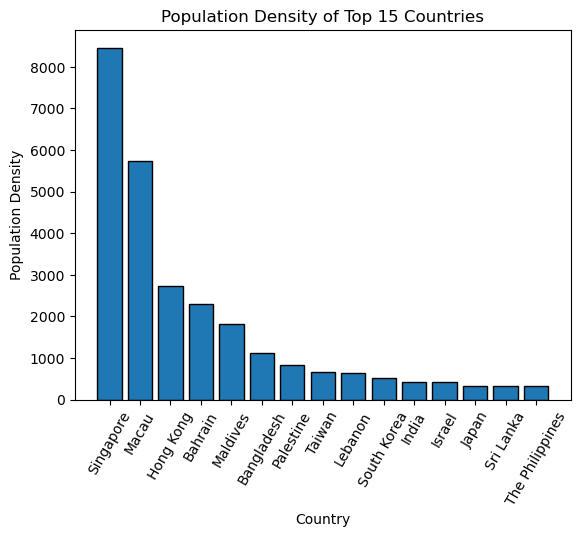

In [15]:
x=descdensityDf['Country'][:15]
y=descdensityDf['Population Density'][:15]
plt.bar(x, y, width=0.8, edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel("Country")
plt.ylabel("Population Density")
plt.title("Population Density of Top 15 Countries")
plt.show()

In [16]:
gdpLink = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_GDP'

In [17]:
gdpData=requests.get(gdpLink)
gdpData

<Response [200]>

In [18]:
gdpSoup=BeautifulSoup(gdpData.text,'html.parser')
gdpSoup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Asian countries by GDP - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-e

In [19]:
gdpTable= gdpSoup.find_all('table')
gdpTable
len(gdpTable)

2

In [20]:
gdpTable[0]

<table class="wikitable">
<tbody><tr>
<th>Region<br/>rank
</th>
<th>Country/Territory
</th>
<th>2024 GDP (nominal) in billions
</th></tr>
<tr>
<td>—
</td>
<td><b><a href="/wiki/Asia" title="Asia">Asia</a></b>
</td>
<td><b>42.72 trillion</b>
</td></tr>
<tr>
<td>1
</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/China" title="C

In [21]:
gdpHeaders=gdpTable[0].find_all('th')
gdpHeaders=[head.text.strip() for head in gdpHeaders]
gdpHeaders

['Regionrank', 'Country/Territory', '2024 GDP (nominal) in billions']

In [22]:
gdpRows=gdpTable[0].find_all('td')
gdpRows=[rows.text.strip() for rows in gdpRows]
gdpRows
finalGdpRows=gdpRows[3:]
finalGdpRows

['1',
 'China',
 '18.53  trillion[2]',
 '2',
 'Japan',
 '4.07  trillion[3]',
 '3',
 'India',
 '3.88  trillion[4]',
 '4',
 'Russia',
 '2.0 trillion',
 '5',
 'South Korea',
 '1.76 trillion',
 '6',
 'Indonesia',
 '1.47  trillion',
 '7',
 'Turkey',
 '1.3 trillion',
 '8',
 'Saudi Arabia',
 '1.11  trillion',
 '9',
 'Taiwan',
 '803.0 billion',
 '10',
 'Thailand',
 '548.9 billion',
 '11',
 'Israel',
 '530.6 billion',
 '12',
 'United Arab Emirates',
 '527.8 billion',
 '13',
 'Singapore',
 '525.2 billion',
 '14',
 'Philippines',
 '471.5 billion',
 '15',
 'Vietnam',
 '465.8 billion',
 '16',
 'Bangladesh',
 '451.16 billion',
 '17',
 'Malaysia',
 '445.5 billion',
 '18',
 'Iran',
 '434.8 billion',
 '19',
 'Hong Kong\n(SAR)',
 '401.5 billion',
 '20',
 'Pakistan',
 '374.6 billion',
 '21',
 'Kazakhstan',
 '292.8 billion',
 '22',
 'Iraq',
 '265.6 billion',
 '23',
 'Qatar',
 '223.3 billion',
 '24',
 'Kuwait',
 '184.8 billion',
 '25',
 'Oman',
 '114.7 billion',
 '26',
 'Uzbekistan',
 '101.8 billion',
 '27

In [23]:
D={}
start=0
for head in gdpHeaders:
    D[head]=[finalGdpRows[i] for i in range(start,len(finalGdpRows),len(gdpHeaders))]
    start+=1
for i,j in D.items():
    print(f'{i}:{j}')

Regionrank:['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']
Country/Territory:['China', 'Japan', 'India', 'Russia', 'South Korea', 'Indonesia', 'Turkey', 'Saudi Arabia', 'Taiwan', 'Thailand', 'Israel', 'United Arab Emirates', 'Singapore', 'Philippines', 'Vietnam', 'Bangladesh', 'Malaysia', 'Iran', 'Hong Kong\n(SAR)', 'Pakistan', 'Kazakhstan', 'Iraq', 'Qatar', 'Kuwait', 'Oman', 'Uzbekistan', 'Turkmenistan', 'Sri Lanka', 'Azerbaijan', 'Myanmar', 'Macau\n(SAR)', 'Jordan', 'Bahrain', 'Nepal', 'Cambodia', 'Lebanon', 'Cyprus', 'Georgia', 'Armenia', 'North Korea', 'Syria', 'Mongolia', 'Palestine', 'Laos', 'Afghanistan', 'Yemen', 'Brunei', 'Kyrgyzstan', 'Tajikistan', 'Maldives', 'Bhutan', 'Timor-Leste']
2024 GDP (nominal) in billions:['18.53  

In [24]:
gdpDf=pd.DataFrame(D)
gdpDf.index=range(1,len(gdpDf)+1)
gdpDf

,Regionrank,Country/Territory,2024 GDP (nominal) in billions
1,1,China,18.53 trillion[2]
2,2,Japan,4.07 trillion[3]
3,3,India,3.88 trillion[4]
4,4,Russia,2.0 trillion
5,5,South Korea,1.76 trillion
6,6,Indonesia,1.47 trillion
7,7,Turkey,1.3 trillion
8,8,Saudi Arabia,1.11 trillion
9,9,Taiwan,803.0 billion
10,10,Thailand,548.9 billion


In [25]:
gdpDf.to_csv('gdpCsv.csv')


In [26]:
densityDf.columns

Index(['Country', 'Capital', 'Area km2', 'Population (2021)',
       'Population Density'],
      dtype='object')

In [27]:
densityDf['Population']=densityDf['Population (2021)']
densityDf

,Country,Capital,Area km2,Population (2021),Population Density,Population
1,Afghanistan,Kabul,652864,39835428,61.016426,39835428
2,Armenia,Yerevan,29743,2968127,99.792455,2968127
3,Azerbaijan,Baku,86600,10223342,118.052448,10223342
4,Bahrain,Manama,760,1748296,2300.389474,1748296
5,Bangladesh,Dhaka,147570,166303498,1126.946520,166303498
6,Bhutan,Thimphu,38394,779898,20.313018,779898
7,Brunei,Bandar Seri Begawan,5765,441532,76.588378,441532
8,Cambodia,Phnom Penh,181035,16946438,93.608628,16946438
9,China (PRC),Beijing,9596961,1444216107,150.486816,1444216107
10,East Timor,Dili,14874,1343873,90.350477,1343873


In [28]:
densityDf=densityDf.drop(['Population (2021)'],axis=1)
densityDf

,Country,Capital,Area km2,Population Density,Population
1,Afghanistan,Kabul,652864,61.016426,39835428
2,Armenia,Yerevan,29743,99.792455,2968127
3,Azerbaijan,Baku,86600,118.052448,10223342
4,Bahrain,Manama,760,2300.389474,1748296
5,Bangladesh,Dhaka,147570,1126.946520,166303498
6,Bhutan,Thimphu,38394,20.313018,779898
7,Brunei,Bandar Seri Begawan,5765,76.588378,441532
8,Cambodia,Phnom Penh,181035,93.608628,16946438
9,China (PRC),Beijing,9596961,150.486816,1444216107
10,East Timor,Dili,14874,90.350477,1343873


In [29]:
gdpDf.columns

Index(['Regionrank', 'Country/Territory', '2024 GDP (nominal) in billions'], dtype='object')

In [30]:
gdpDf['Country']=gdpDf['Country/Territory']
gdpDf['Gdp in billion']=gdpDf['2024 GDP (nominal) in billions']
gdpDf.columns

Index(['Regionrank', 'Country/Territory', '2024 GDP (nominal) in billions',
       'Country', 'Gdp in billion'],
      dtype='object')

In [31]:
gdpDf=gdpDf.drop('Country/Territory',axis=1)
gdpDf=gdpDf.drop('2024 GDP (nominal) in billions',axis=1)

In [32]:
gdpDf

,Regionrank,Country,Gdp in billion
1,1,China,18.53 trillion[2]
2,2,Japan,4.07 trillion[3]
3,3,India,3.88 trillion[4]
4,4,Russia,2.0 trillion
5,5,South Korea,1.76 trillion
6,6,Indonesia,1.47 trillion
7,7,Turkey,1.3 trillion
8,8,Saudi Arabia,1.11 trillion
9,9,Taiwan,803.0 billion
10,10,Thailand,548.9 billion


In [33]:
densityDf.columns


Index(['Country', 'Capital', 'Area km2', 'Population Density', 'Population'], dtype='object')

In [34]:
gdpDf.columns

Index(['Regionrank', 'Country', 'Gdp in billion'], dtype='object')

In [35]:
finalDf=pd.merge(densityDf,gdpDf,on='Country',how='inner')
finalDf.index=range(1,len(finalDf)+1)
finalDf

,Country,Capital,Area km2,Population Density,Population,Regionrank,Gdp in billion
1,Afghanistan,Kabul,652864,61.016426,39835428,45,17.1 billion
2,Armenia,Yerevan,29743,99.792455,2968127,39,27.5 billion
3,Azerbaijan,Baku,86600,118.052448,10223342,29,80.9 billion
4,Bahrain,Manama,760,2300.389474,1748296,33,46.8 billion
5,Bangladesh,Dhaka,147570,1126.946520,166303498,16,451.16 billion
6,Bhutan,Thimphu,38394,20.313018,779898,51,3.31 billion
7,Brunei,Bandar Seri Begawan,5765,76.588378,441532,47,16.4 billion
8,Cambodia,Phnom Penh,181035,93.608628,16946438,35,45.2 billion
9,Georgia,Tbilisi,69700,57.098494,3979765,38,36.6 billion
10,India,New Delhi,3287263,423.881216,1393409038,3,3.88 trillion[4]


In [36]:
import re
def convertGdpToBillion(value):
    value.replace(',','').strip()
    value=re.sub(r'\[.*?\]','',value)

    if 'billion' in value:
        value=value.replace('billion','').strip()
        return float(value)
    elif 'trillion' in value:
        value=value.replace('trillion','').strip()
        return float(value)*10**3
    elif 'million' in value:
        value=value.replace('million','').strip()
        return float(value)/10**3
finalDf['Final Gdp in Billion']=finalDf['Gdp in billion'].apply(convertGdpToBillion)
finalDf

,Country,Capital,Area km2,Population Density,Population,Regionrank,Gdp in billion,Final Gdp in Billion
1,Afghanistan,Kabul,652864,61.016426,39835428,45,17.1 billion,17.10
2,Armenia,Yerevan,29743,99.792455,2968127,39,27.5 billion,27.50
3,Azerbaijan,Baku,86600,118.052448,10223342,29,80.9 billion,80.90
4,Bahrain,Manama,760,2300.389474,1748296,33,46.8 billion,46.80
5,Bangladesh,Dhaka,147570,1126.946520,166303498,16,451.16 billion,451.16
6,Bhutan,Thimphu,38394,20.313018,779898,51,3.31 billion,3.31
7,Brunei,Bandar Seri Begawan,5765,76.588378,441532,47,16.4 billion,16.40
8,Cambodia,Phnom Penh,181035,93.608628,16946438,35,45.2 billion,45.20
9,Georgia,Tbilisi,69700,57.098494,3979765,38,36.6 billion,36.60
10,India,New Delhi,3287263,423.881216,1393409038,3,3.88 trillion[4],3880.00


In [37]:
finalDf=finalDf.drop('Gdp in billion',axis=1)
finalDf

,Country,Capital,Area km2,Population Density,Population,Regionrank,Final Gdp in Billion
1,Afghanistan,Kabul,652864,61.016426,39835428,45,17.10
2,Armenia,Yerevan,29743,99.792455,2968127,39,27.50
3,Azerbaijan,Baku,86600,118.052448,10223342,29,80.90
4,Bahrain,Manama,760,2300.389474,1748296,33,46.80
5,Bangladesh,Dhaka,147570,1126.946520,166303498,16,451.16
6,Bhutan,Thimphu,38394,20.313018,779898,51,3.31
7,Brunei,Bandar Seri Begawan,5765,76.588378,441532,47,16.40
8,Cambodia,Phnom Penh,181035,93.608628,16946438,35,45.20
9,Georgia,Tbilisi,69700,57.098494,3979765,38,36.60
10,India,New Delhi,3287263,423.881216,1393409038,3,3880.00


In [38]:
finalDf['Gdp per capita']=finalDf['Final Gdp in Billion']/finalDf['Population']*10**9
finalDf


,Country,Capital,Area km2,Population Density,Population,Regionrank,Final Gdp in Billion,Gdp per capita
1,Afghanistan,Kabul,652864,61.016426,39835428,45,17.10,429.266130
2,Armenia,Yerevan,29743,99.792455,2968127,39,27.50,9265.102201
3,Azerbaijan,Baku,86600,118.052448,10223342,29,80.90,7913.263588
4,Bahrain,Manama,760,2300.389474,1748296,33,46.80,26768.922425
5,Bangladesh,Dhaka,147570,1126.946520,166303498,16,451.16,2712.871379
6,Bhutan,Thimphu,38394,20.313018,779898,51,3.31,4244.144747
7,Brunei,Bandar Seri Begawan,5765,76.588378,441532,47,16.40,37143.400705
8,Cambodia,Phnom Penh,181035,93.608628,16946438,35,45.20,2667.227178
9,Georgia,Tbilisi,69700,57.098494,3979765,38,36.60,9196.522910
10,India,New Delhi,3287263,423.881216,1393409038,3,3880.00,2784.537702


In [39]:
finalDf.to_csv('GdpPerCapita.csv')

<BarContainer object of 46 artists>

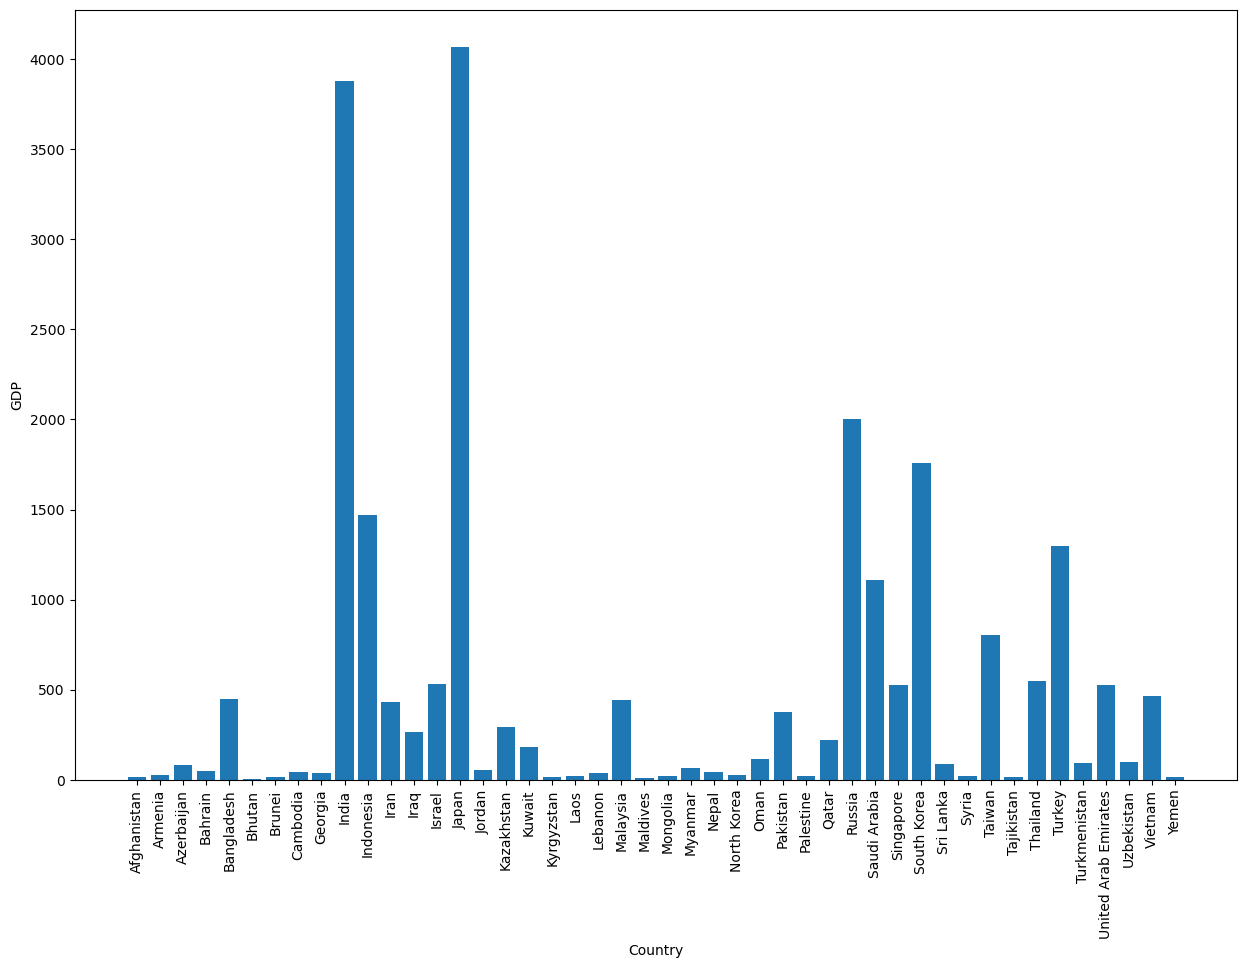

In [40]:
x=finalDf['Country']
y=finalDf['Final Gdp in Billion']
plt.figure(figsize=(15,10))
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=90)
plt.bar(x,y)


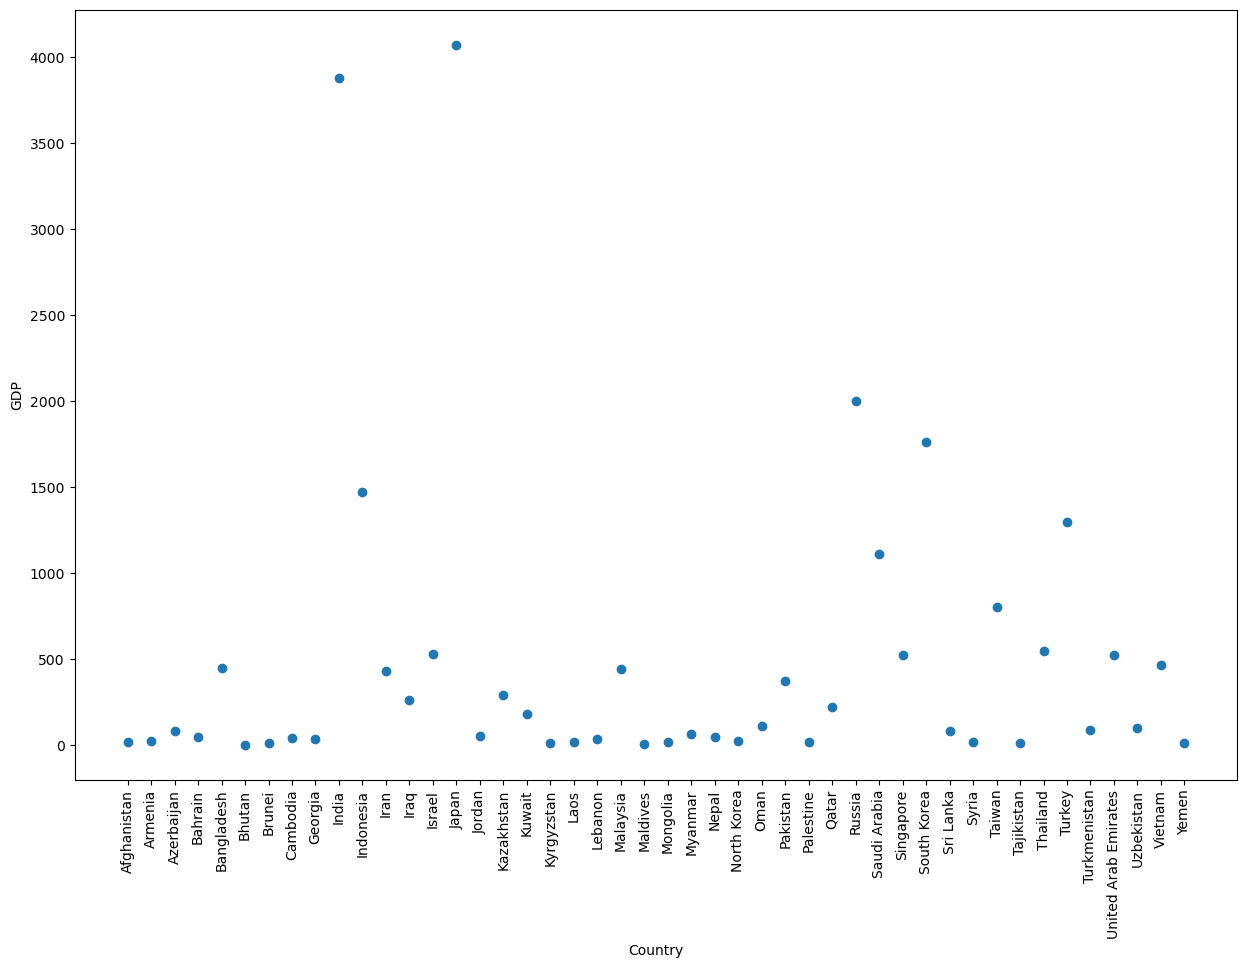

In [41]:
x=finalDf['Country']
y=finalDf['Final Gdp in Billion']
plt.figure(figsize=(15,10))
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=90)
plt.scatter(x,y)


In [42]:
sortedGdpDf=finalDf.sort_values(by='Final Gdp in Billion',ascending=False)
sortedGdpDf

,Country,Capital,Area km2,Population Density,Population,Regionrank,Final Gdp in Billion,Gdp per capita
15,Japan,Tokyo,377915,333.542738,126050804,2,4070.00,32288.568346
10,India,New Delhi,3287263,423.881216,1393409038,3,3880.00,2784.537702
32,Russia,Moscow,17098242,8.523335,145734038,4,2000.00,13723.629891
35,South Korea,Seoul,100210,511.976709,51305186,5,1760.00,34304.524303
11,Indonesia,Jakarta,1904569,145.104632,276361783,6,1470.00,5319.114619
41,Turkey,Ankara,783562,108.533515,85042738,7,1300.00,15286.431629
33,Saudi Arabia,Riyadh,2149690,16.439897,35340683,8,1110.00,31408.561063
38,Taiwan,Taipei,36193,659.105628,23855010,9,803.00,33661.692030
40,Thailand,Bangkok,513120,136.324544,69950850,10,548.90,7846.938243
14,Israel,Jerusalem (disputed),20770,423.195667,8789774,11,530.60,60365.602119


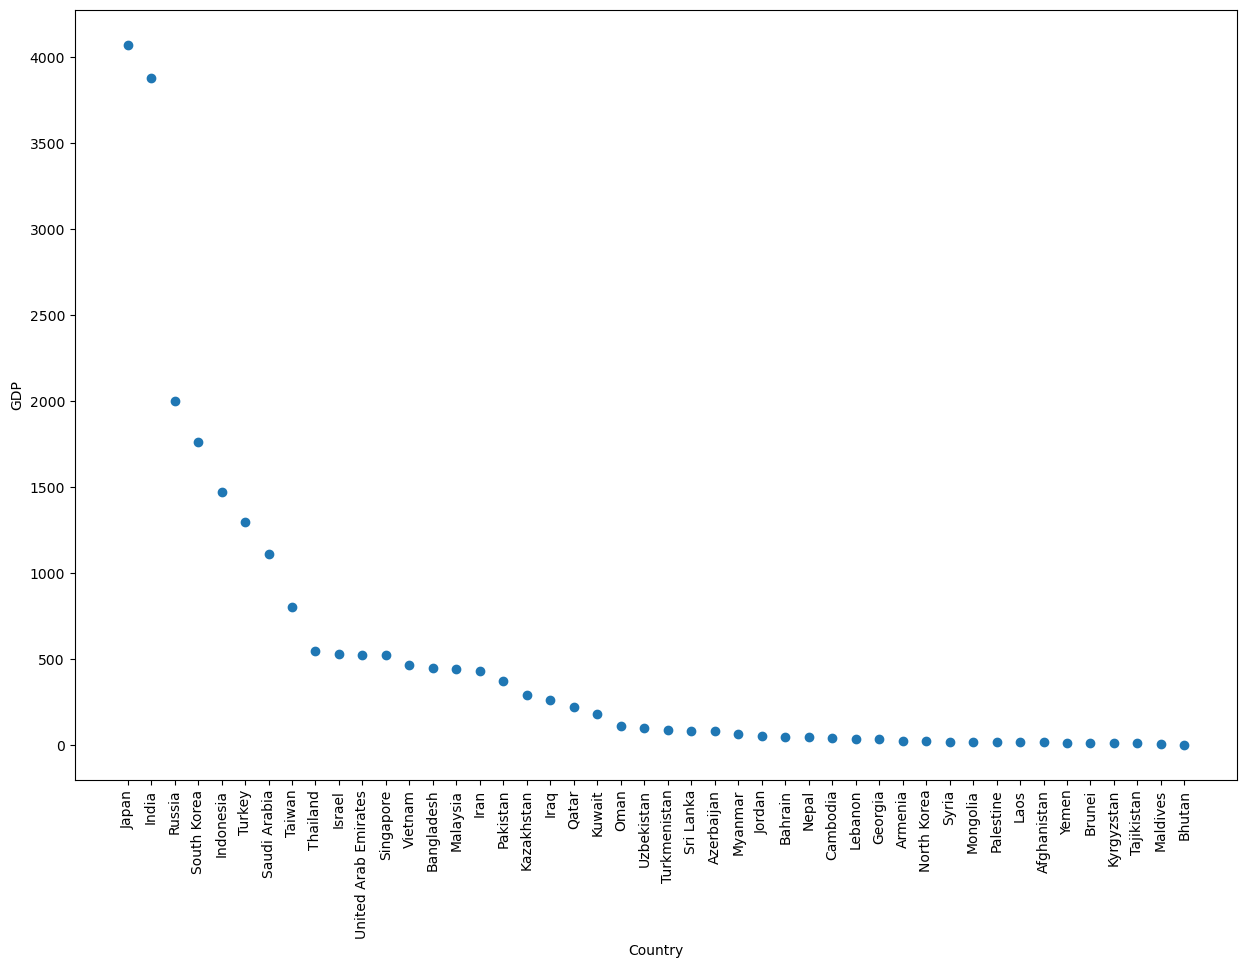

In [43]:
x=sortedGdpDf['Country']
y=sortedGdpDf['Final Gdp in Billion']
plt.figure(figsize=(15,10))
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=90)
plt.scatter(x,y)

<BarContainer object of 46 artists>

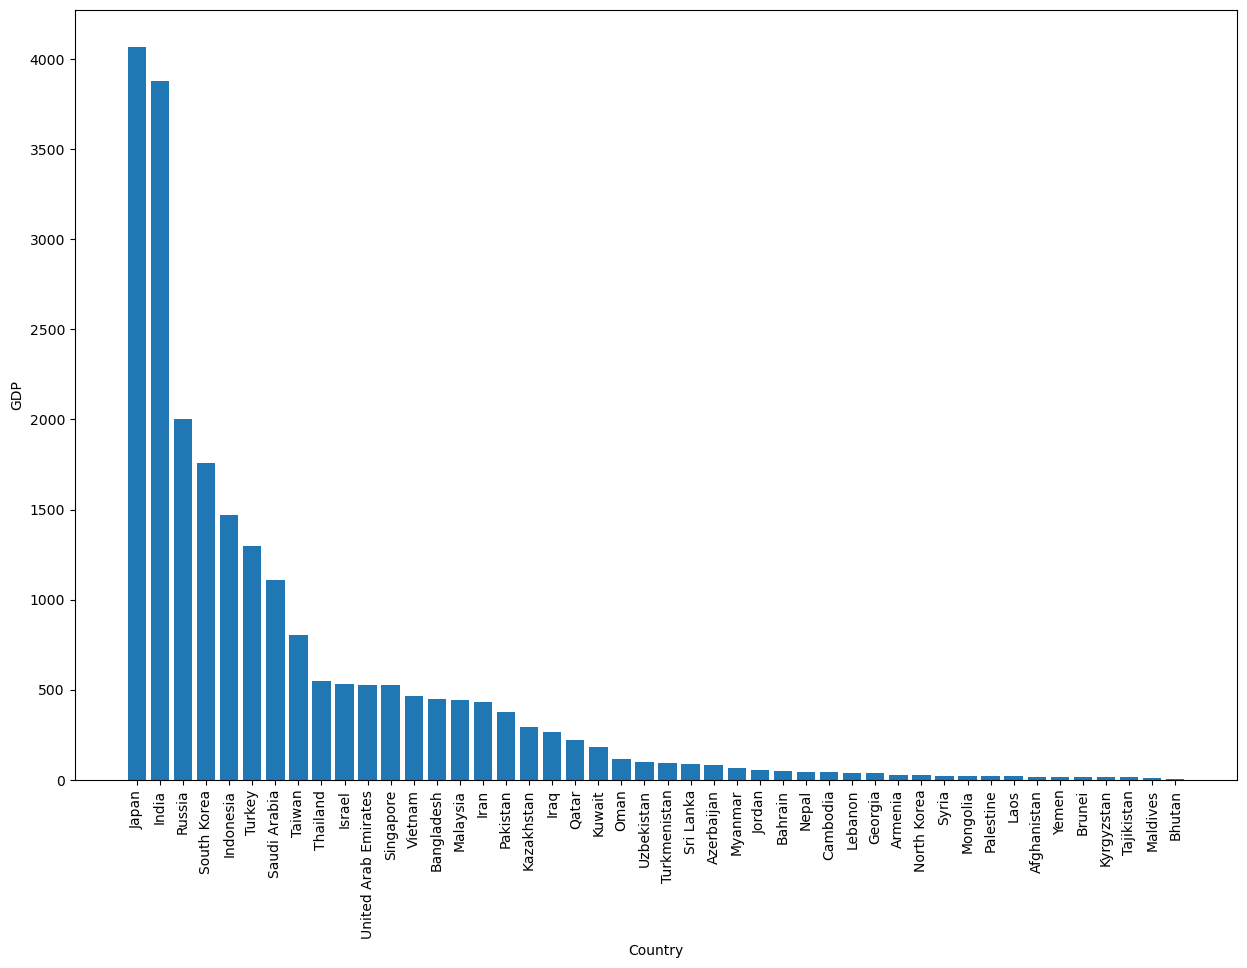

In [44]:
x=sortedGdpDf['Country']
y=sortedGdpDf['Final Gdp in Billion']
plt.figure(figsize=(15,10))
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=90)
plt.bar(x,y)

<BarContainer object of 46 artists>

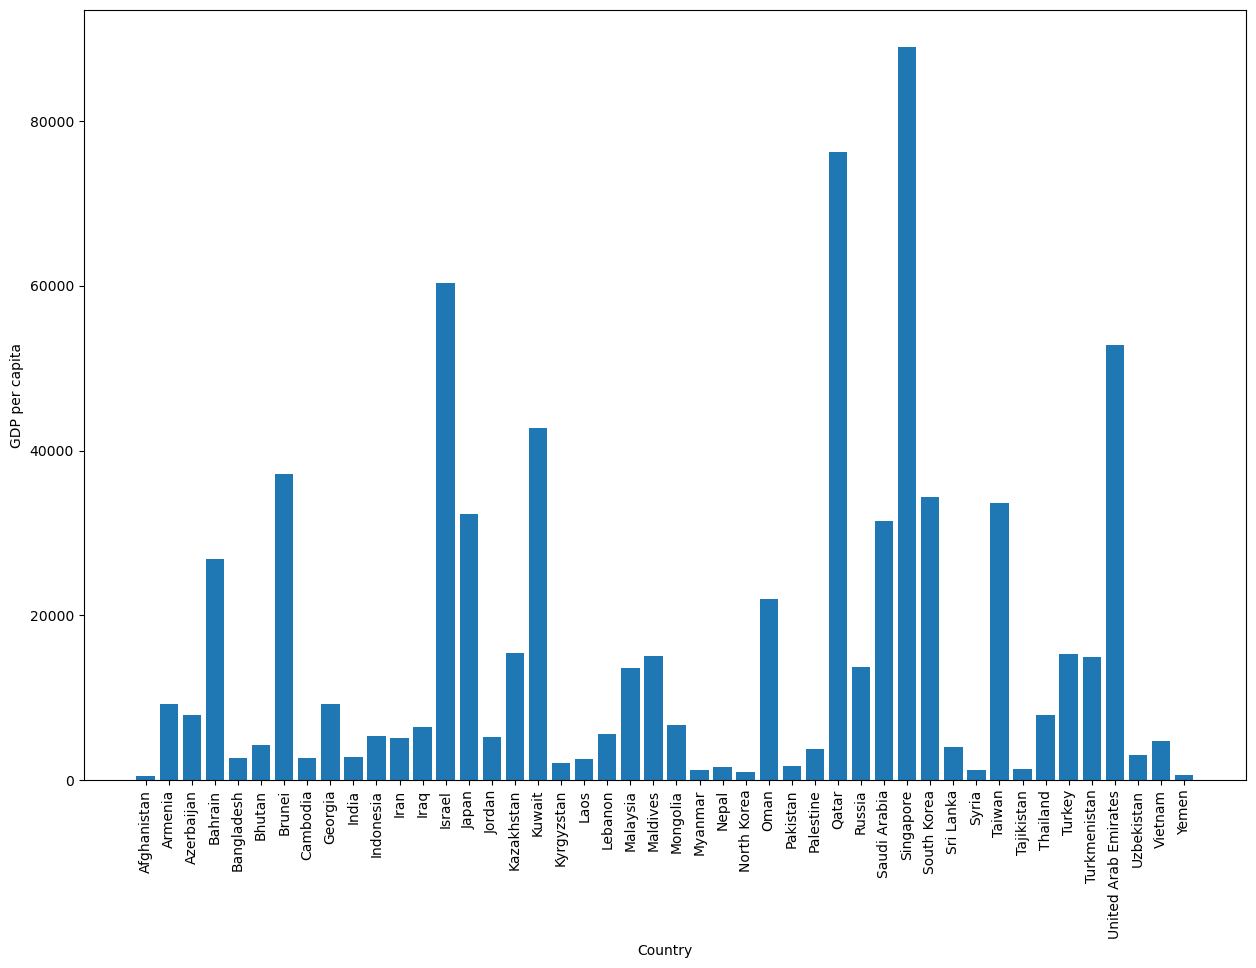

In [45]:
x=finalDf['Country']
y=finalDf['Gdp per capita']
plt.figure(figsize=(15,10))
plt.xlabel('Country')
plt.ylabel('GDP per capita')
plt.xticks(rotation=90)
plt.bar(x,y)

In [46]:
sortedGdpPerCapitaDf=finalDf.sort_values(by="Gdp per capita",ascending=False)
sortedGdpPerCapitaDf

,Country,Capital,Area km2,Population Density,Population,Regionrank,Final Gdp in Billion,Gdp per capita
34,Singapore,Singapore,697,8460.094692,5896686,13,525.20,89066.977621
31,Qatar,Doha,11586,252.936993,2930528,23,223.30,76197.872875
14,Israel,Jerusalem (disputed),20770,423.195667,8789774,11,530.60,60365.602119
43,United Arab Emirates,Abu Dhabi,83600,119.510634,9991089,12,527.80,52827.074206
18,Kuwait,Kuwait City,17818,242.931305,4328550,24,184.80,42693.280660
7,Brunei,Bandar Seri Begawan,5765,76.588378,441532,47,16.40,37143.400705
35,South Korea,Seoul,100210,511.976709,51305186,5,1760.00,34304.524303
38,Taiwan,Taipei,36193,659.105628,23855010,9,803.00,33661.692030
15,Japan,Tokyo,377915,333.542738,126050804,2,4070.00,32288.568346
33,Saudi Arabia,Riyadh,2149690,16.439897,35340683,8,1110.00,31408.561063


<BarContainer object of 46 artists>

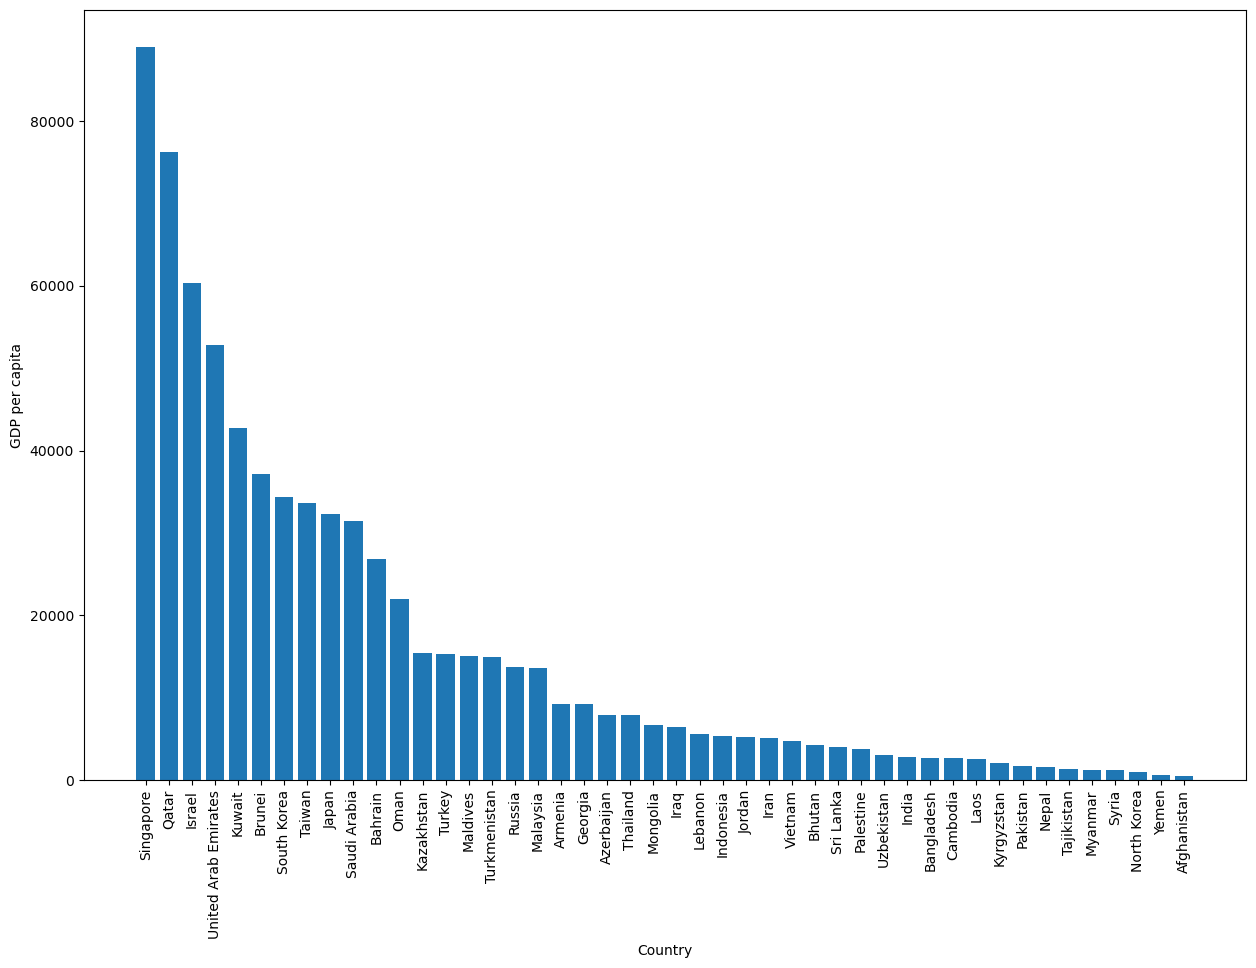

In [47]:
x=sortedGdpPerCapitaDf['Country']
y=sortedGdpPerCapitaDf['Gdp per capita']
plt.figure(figsize=(15,10))
plt.xlabel('Country')
plt.ylabel('GDP per capita')
plt.xticks(rotation=90)
plt.bar(x,y)

In [48]:
import seaborn as sns

In [49]:
finalDf

,Country,Capital,Area km2,Population Density,Population,Regionrank,Final Gdp in Billion,Gdp per capita
1,Afghanistan,Kabul,652864,61.016426,39835428,45,17.10,429.266130
2,Armenia,Yerevan,29743,99.792455,2968127,39,27.50,9265.102201
3,Azerbaijan,Baku,86600,118.052448,10223342,29,80.90,7913.263588
4,Bahrain,Manama,760,2300.389474,1748296,33,46.80,26768.922425
5,Bangladesh,Dhaka,147570,1126.946520,166303498,16,451.16,2712.871379
6,Bhutan,Thimphu,38394,20.313018,779898,51,3.31,4244.144747
7,Brunei,Bandar Seri Begawan,5765,76.588378,441532,47,16.40,37143.400705
8,Cambodia,Phnom Penh,181035,93.608628,16946438,35,45.20,2667.227178
9,Georgia,Tbilisi,69700,57.098494,3979765,38,36.60,9196.522910
10,India,New Delhi,3287263,423.881216,1393409038,3,3880.00,2784.537702


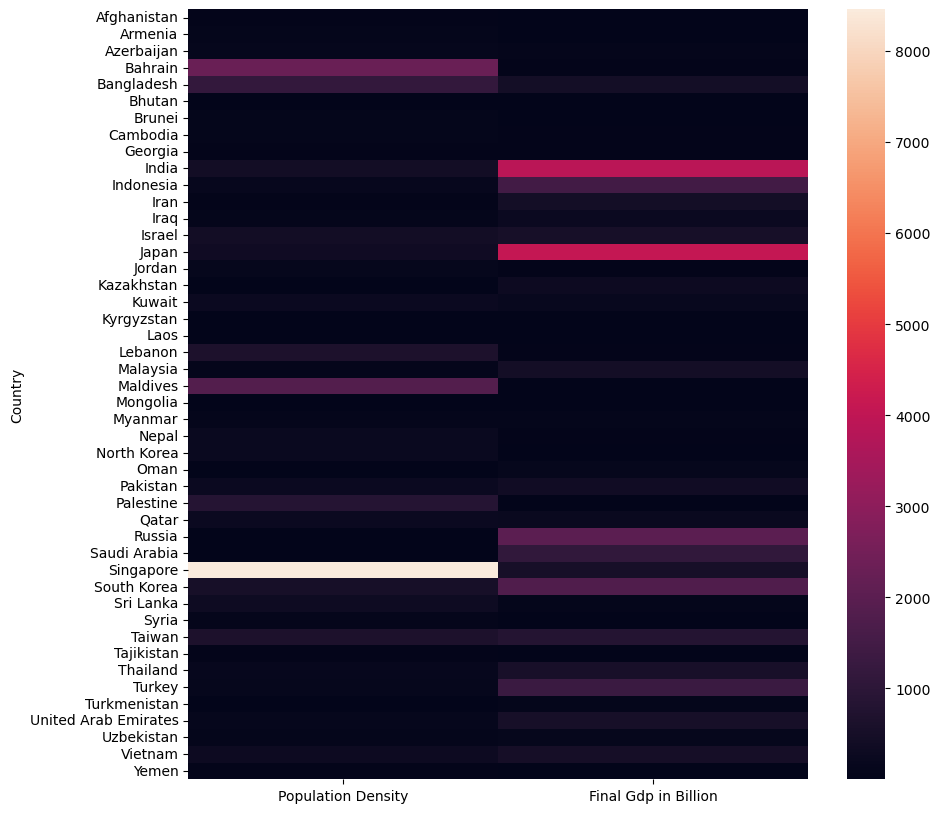

In [50]:
heatmapDf=finalDf[['Country','Population Density','Final Gdp in Billion']]
heatmapDf=heatmapDf.set_index('Country')
plt.figure(figsize=(10,10))
sns.heatmap(heatmapDf)
plt.show()

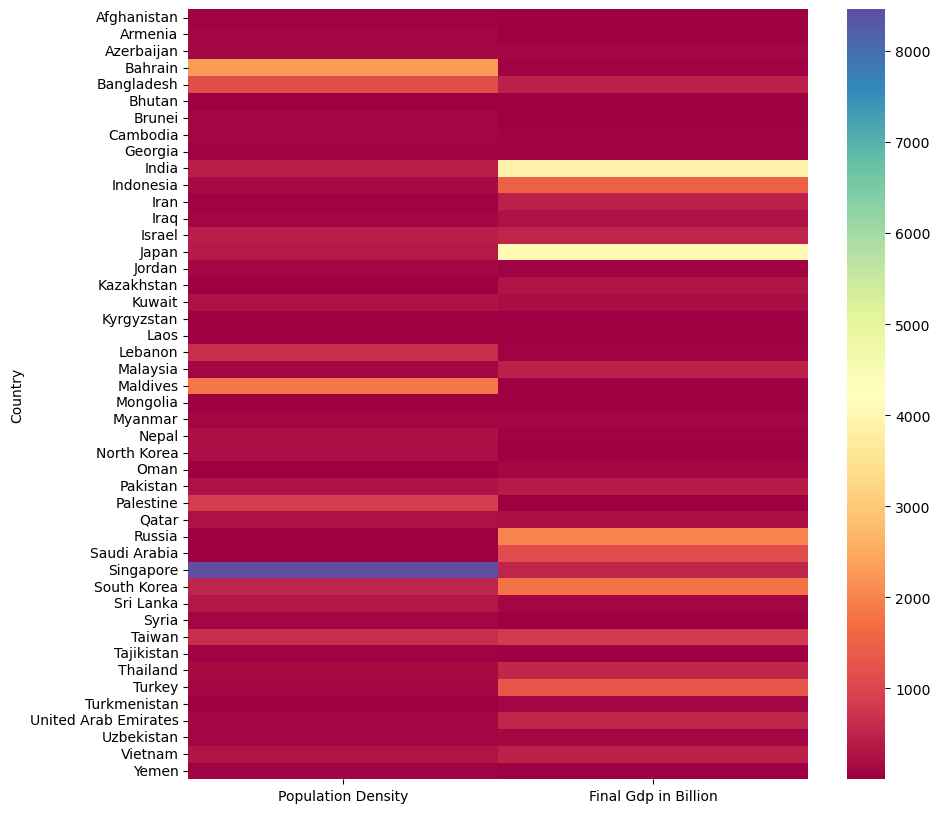

In [51]:
heatmapDf=finalDf[['Country','Population Density','Final Gdp in Billion']]
heatmapDf=heatmapDf.set_index('Country')
plt.figure(figsize=(10,10))
sns.heatmap(heatmapDf,cmap="Spectral")
plt.show()

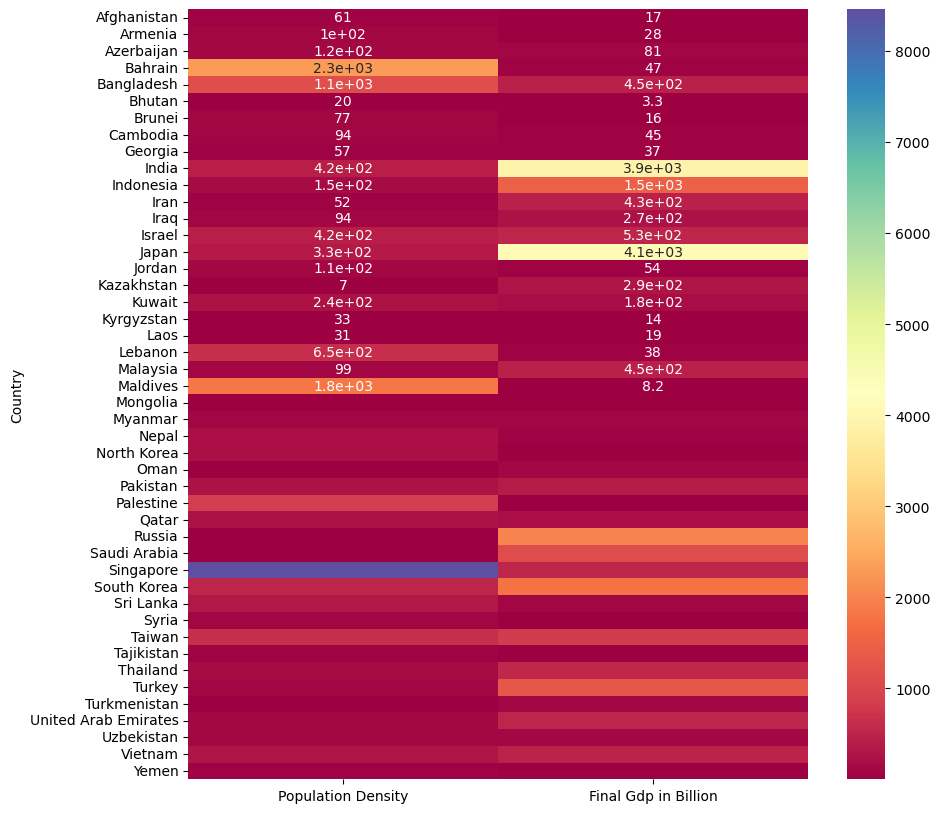

In [52]:
heatmapDf=finalDf[['Country','Population Density','Final Gdp in Billion']]
heatmapDf=heatmapDf.set_index('Country')
plt.figure(figsize=(10,10))
sns.heatmap(heatmapDf,cmap="Spectral",annot=True)
plt.show()

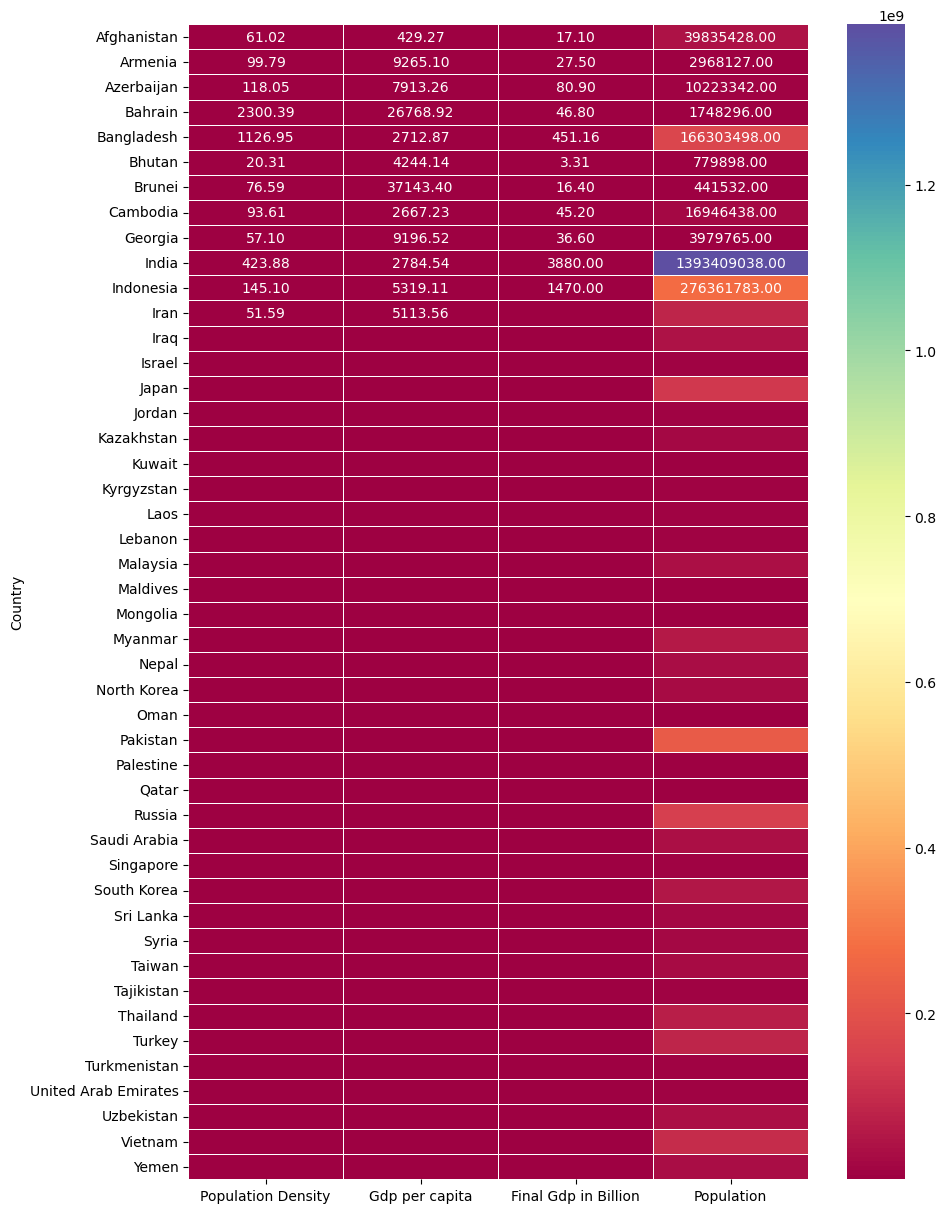

In [53]:
heatmapDf=finalDf[['Country', 'Population Density','Gdp per capita','Final Gdp in Billion','Population']]
heatmapDf=heatmapDf.set_index('Country')
plt.figure(figsize=(10,15))
sns.heatmap(heatmapDf,cmap="Spectral",annot=True,linewidths=0.5,fmt='.2f')
plt.show()

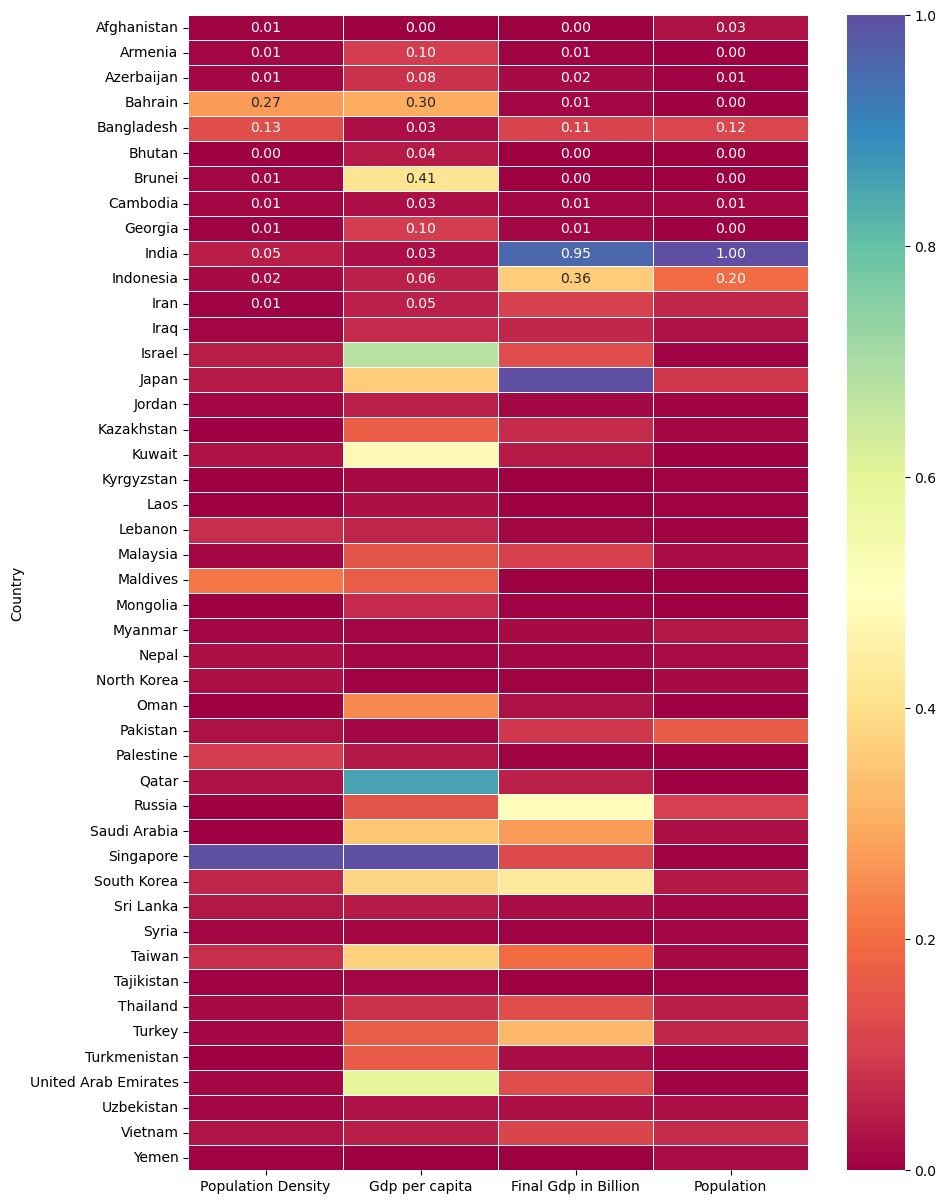

In [54]:
heatmapDf=finalDf[['Country', 'Population Density','Gdp per capita','Final Gdp in Billion','Population']]
heatmapDf=heatmapDf.set_index('Country')
plt.figure(figsize=(10,15))
scaledDf=(heatmapDf - heatmapDf.min())/(heatmapDf.max()-heatmapDf.min())
sns.heatmap(scaledDf,cmap="Spectral",annot=True,linewidths=0.5,fmt='.2f')
plt.show()

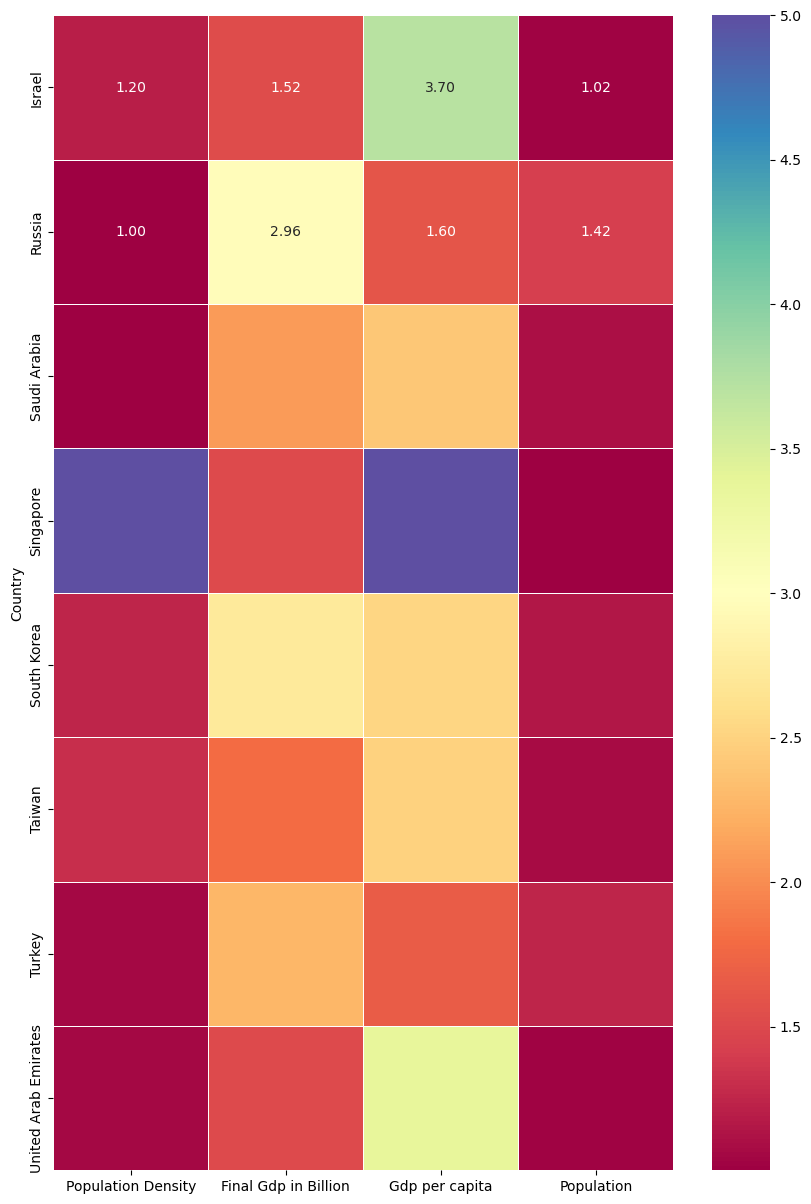

In [55]:
from sklearn.preprocessing import MinMaxScaler
heatmapDf=finalDf[['Country','Population Density','Final Gdp in Billion','Gdp per capita','Population']]
heatmapDf=heatmapDf.set_index('Country')
plt.figure(figsize=(10,15))
scale=MinMaxScaler(feature_range=(1,5))
scaleDf=pd.DataFrame(scale.fit_transform(heatmapDf),columns=heatmapDf.columns,index=heatmapDf.index)
finalCountryDf=scaleDf[
    (scaleDf['Final Gdp in Billion']>=1.5) & (scaleDf['Final Gdp in Billion']<=5) & (scaleDf['Gdp per capita']>=1.5) & (scaleDf['Gdp per capita']<=5)


]
sns.heatmap(finalCountryDf,cmap="Spectral",annot=True,fmt='.2f',linewidths=0.5)
plt.show()